In [ ]:
# sample from exponential distribution and try to find the likelihood and 
# posterior plots in the hyp and data spaces. Try plotting 3d plots to find two parameters

In [2]:
# Use bayes rule to compare two model hypotheses.

In [239]:
!pip install mpl_toolkits

  Could not find a version that satisfies the requirement mpl_toolkits (from versions: )
No matching distribution found for mpl_toolkits
You are using pip version 19.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


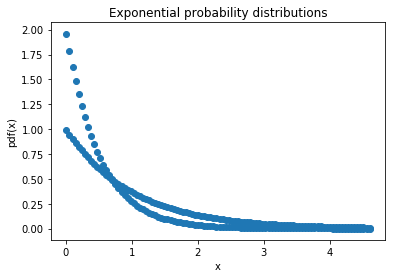

In [240]:
from scipy.stats import expon, norm
from mpl_toolkits import mplot3d

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)

plt.title('Exponential probability distributions')
plt.xlabel('x')
plt.ylabel('pdf(x)')
#scale is 1/lambda
plt.scatter(x=(x,x), y=(expon.pdf(x), expon.pdf(x, scale=0.5)))
plt.show()

In [228]:
class Bayesian:
    
    def __init__(self, pdf):
        self.hyp_pdf = pdf
        self.hyp_params = None
        self.theta = None
        self.likelihood_fn = None
    

    # often this would be log likehood where we sum the log(probs) instead of take the product
    def likelihood(self, X, min_w_lim=0, max_w_lim=10, nb_of_ws=100, nb_dims =1):
        
        # prob(data | params) i.e. prob in hypothesis space
        # assume single param w for now
        if nb_dims ==1:
            beta_range = np.linspace(min_w_lim, max_w_lim, num=nb_of_ws)
            arr = np.zeros(nb_of_ws)
            
            for i in range(1, len(beta_range)):
                beta_ = beta_range[i]
                first_likelihood = self.hyp_pdf(X[0], scale=beta_)
                likelihood = first_likelihood
                # product of probs
                for x in X:
                    likelihood *= self.hyp_pdf(x, scale=beta_)
                arr[i] = likelihood / first_likelihood
            
            hyp_space = beta_range
        
        # normal distribution --> could generalise to n nb_dims and not assume normal later
        if nb_dims == 2:
            sigma_range = np.linspace(1, max_w_lim, num=nb_of_ws)
            mu_range = np.linspace(min_w_lim, max_w_lim, num=nb_of_ws)
            arr = np.zeros(np.square(nb_of_ws)).reshape(nb_of_ws, nb_of_ws)

            for i in range(0, len(sigma_range)):
                sigma_ = sigma_range[i]
                for j in range(0, len(mu_range)):
                    mu_ = mu_range[j]
                    first_likelihood = self.hyp_pdf(X[0], loc=mu_, scale=sigma_)
                    likelihood = first_likelihood
                    # product of probs
                    for x in X:
                        likelihood *= self.hyp_pdf(x, loc=mu_, scale=sigma_)
                    if first_likelihood == 0:
                        arr[i,j] = 0 
                    else:
                        arr[i,j] = likelihood / first_likelihood
            hyp_space = np.concatenate((sigma_range.reshape(len(sigma_range),1), mu_range.reshape(len(mu_range),1)), axis=1)
        likelihood_fn = arr
        self.likelihood_fn = likelihood_fn, hyp_space
        return self.likelihood_fn
    
    def max_likelihood(self):
        max_likelihood_val_idx = np.argmax(self.likelihood_fn[0])
        return self.likelihood_fn[1][max_likelihood_val_idx]
    

In [160]:
# draw points from an exponential distribution to get dataset
# plot likelihood fn of lambda in hypothesis space

beta = 4
num_samples =100
X_exp = np.random.exponential(scale=beta, size=(num_samples,))

print(X[:10])

[ 8.39459309  2.85595349  0.59643742  0.68816705  4.00870162 13.17937066
 17.64522687  8.7204609   4.77017     6.31918875]


In [161]:
exp_pdf = expon.pdf
bayes_exp = Bayesian(exp_pdf)

In [162]:
likelihood_in_hyp_space = bayes_exp.likelihood(X=X_exp)
# likelihood_in_hyp_space[0][:10]
likelihood_in_hyp_space[0][90:]

array([1.13044590e-117, 6.38375170e-118, 3.60669738e-118, 2.03891924e-118,
       1.15343403e-118, 6.53026278e-119, 3.70044193e-119, 2.09893387e-119,
       1.19179294e-119, 6.77473109e-120])

/Users/OFlynn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


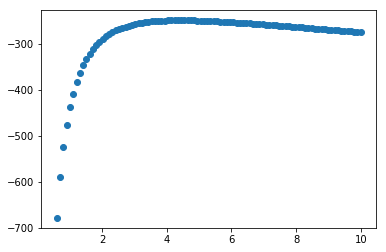

In [163]:
plt.scatter(y=np.log(likelihood_in_hyp_space[0]), x=likelihood_in_hyp_space[1])

In [164]:
print('The maximum likelihood of beta is: \n', round(bayes_exp.max_likelihood(), 5))

The maximum likelihood of beta is: 
 4.44444


In [275]:
# draw points from a normal distribution to get dataset
# Plot 3-d likelihood function for mu and sigma assuming normal distribution

mu, sigma = 40, 20
num_samples_norm =100
X_norm = np.random.normal(loc=mu, scale=sigma, size=(num_samples_norm,))

X_norm[:10]

array([41.9924382 , 37.05872152, 50.07704078, 30.78301372, 47.50876434,
       58.35370396, 31.64954691, 52.55714235, 15.09199675, 44.85671299])

In [276]:
norm_pdf = norm.pdf
bayes_norm = Bayesian(norm_pdf)

In [277]:
norm_likelihood_in_hyp_space = bayes_norm.likelihood(X=X_norm,  min_w_lim=-10, max_w_lim=100, nb_of_ws=10, nb_dims=2)
print(norm_likelihood_in_hyp_space[0].shape)
print(norm_likelihood_in_hyp_space[1].shape)

(10, 10)
(10, 2)


In [291]:
idx1, idx2 = 1, 5
print('Likelihood of sigma of {} and mu of {} is: \n'.format(norm_likelihood_in_hyp_space[1][idx1,0], norm_likelihood_in_hyp_space[1][idx2,1]), norm_likelihood_in_hyp_space[0][idx1, idx2])

Likelihood of sigma of 12.0 and mu of 51.11111111111111 is: 
 1.2971909987895128e-225


(10,) (10,) (10, 10)
1.0 -10.0
[[  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]]


/Users/OFlynn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show(*args, **kw)>

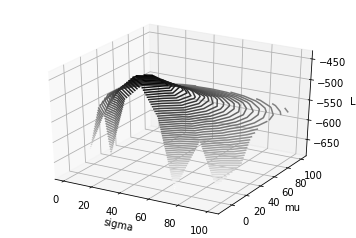

In [297]:
x1 = norm_likelihood_in_hyp_space[1][:,0]
y1 = norm_likelihood_in_hyp_space[1][:,1]
z1 = norm_likelihood_in_hyp_space[0]

print(x1.shape, y1.shape, z1.shape)
print(min(x1), min(y1))
X, Y = np.meshgrid(x1, y1)
Z = np.log(z1)

print(X)
# plt.figure(figsize=(6,5))
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('sigma')
ax.set_ylabel('mu')
ax.set_zlabel('L');
# plt.xlim([0, 5])
# plt.ylim([-15,15])
plt.show

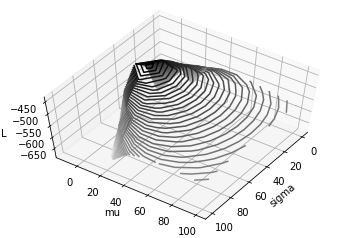

In [283]:
ax.view_init(60, 35)
fig

In [298]:
np.where(Z==Z.max())

(array([2]), array([4]))

In [304]:
print('Max log likelihood is: \n', Z[2][4], '\n with mu equal to {} and sigma equal to {}'.format(X[2][4], Y[2][4]))
# BUG SOMEWHERE SWITCHING MU AND SIGMA
print('Golden truth mu is {} and sigma is {}'.format(mu, sigma))

Max log likelihood is: 
 -435.8834964255112 
 with mu equal to 45.0 and sigma equal to 14.444444444444443
Golden truth mu is 40 and sigma is 20
